Regression Analysis

This section performs a linear regression analysis using the sales data. However largely used for forecasting, I will not take this results as a prediction as demand is not allways linear in time. Since other reliable source of data are not available in the needed amount for a more robust regression analysis, I run this one as a means of getting an idea about the general sales trend for next year.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [5]:
#read the cleaned data
sales = pd.read_csv('vendas_por_mes.csv')

In [56]:
#checking the df
sales.tail(10)

,month,qind,qdist,qtotal
50,2021-09-01,0.0,0.0,0.0
51,2021-10-01,0.0,0.0,0.0
52,2021-11-01,7548.0,34992.0,42540.0
53,2021-12-01,6558.0,1456.0,8014.0
54,2022-01-01,4060.0,96.0,4156.0
55,2022-02-01,1148.0,112.0,1260.0
56,2022-03-01,680.0,0.0,680.0
57,2022-04-01,353.0,0.0,353.0
58,2022-05-01,319.0,383.0,702.0
59,2022-06-01,0.0,564.0,564.0


In [8]:
#change date to datetime format
sales['month'] = pd.to_datetime(sales['month'])
sales.dtypes

month     datetime64[ns]
qind             float64
qdist            float64
qtotal           float64
dtype: object

In [77]:
#Since I've been told that the best for the company is to have all the stocks sold by february, once this 
#minimizes sales costs, I used this time slice to make the analysis.

#create an empty df with the years in the sales df
years = sales['month'].dt.year.unique()[1:]
year_sales = pd.DataFrame({'year': years, 'qind': 0, 'qdist': 0, 'qtotal': 0})

#select the 4 target sales months and sum 
m = 4
for i in range(5):
    yearly_sum = sales[m:m+4].sum()
    m += 12

    #iterate through columns to write the results
    for n in range(1,4):
        year_sales.iloc[i, n] = yearly_sum[n-1]

In [78]:
#the result is a df with the total yearly sales for each custumer and total
year_sales

,year,qind,qdist,qtotal
0,2018,3307.0,9430.0,12737.0
1,2019,7321.0,21564.0,28885.0
2,2020,10411.0,22474.0,32885.0
3,2021,20247.0,26448.0,46695.0
4,2022,19314.0,36656.0,55970.0


In [93]:
def regression_line(df, date_col, obj_col):
    
    #fit func
    x = np.arange(df[date_col].size)
    fit = np.polyfit(x, df[obj_col], deg=1)
    fit_func = np.poly1d(fit)
        
    return fit_func

In [99]:
def regression_forecast(reg_fit_func, df, obj_col):
    """create regression function and make one step ahead forecast"""

    #make the forecast
    prediction = reg_fit_func(df[obj_col].size + 0.1)
    
    return prediction

In [110]:
def plot_regression(df, date_col, obj_col, fit_func, forecast=True):
    """cria funcao de regressao e plota o grafico"""

    if forecast==True:
        value = regression_forecast(fit_func, df, obj_col)
        
        add = {date_col: df[date_col].iloc[-1] +1, obj_col: value}
        df = df.append(add, ignore_index=True)
    
    x = np.arange(df[date_col].size)
    
    #create figure
    plt.figure(figsize=[12, 5])
    #linear regression plot
    plt.plot(df[date_col], fit_func(x))
    #time series data plot
    
    ##tem que tirar a previsao das receitas reais!
    plt.plot(df[date_col], df[obj_col])
    plt.xticks(rotation=20)
    #legenda
    plt.legend(labels=['Tendência', 'Receitas reais'])
    #plt.xlabel('Data')
    #plt.ylabel('Receitas')
    plt.title('Tendência de vendas')
    

In [100]:
#call the functions 
reg_func = regression_line(year_sales, 'year', 'qtotal')
forecast = regression_forecast(reg_func, year_sales, 'qtotal')

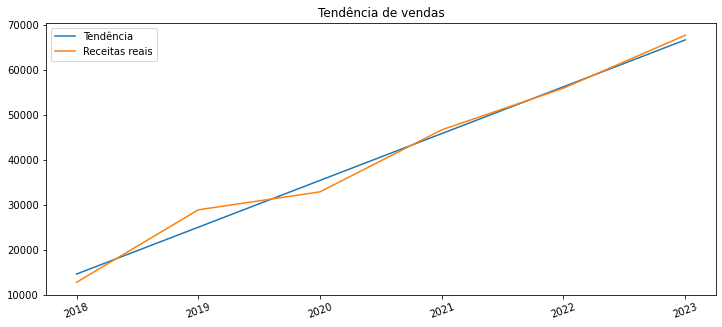

In [111]:
plot_regression(year_sales, 'year', 'qtotal', reg_func)

In [ ]:
#save figure
plt.savefig('Tendencia_vendas.png')